<a href="https://colab.research.google.com/github/Khachatryan10/Image-classification-model/blob/main/CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-datasets
!pip install --upgrade keras
!pip install tensorflow-datasets

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets
import tensorflow_datasets as tfds
import os
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam

In [1]:
EPOCHS = 70
BATCH_SIZE = 500

In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    "cifar10",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [5]:
classes = ["Airplane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [6]:
def rescale_images(image, label):
    image = tf.cast(image, "float32") / 255.0
    return image, label

In [7]:
training_dataset = ds_train.map(rescale_images, num_parallel_calls=tf.data.experimental.AUTOTUNE)
training_dataset = training_dataset.shuffle(ds_info.splits["train"].num_examples)
training_dataset = training_dataset.cache()
training_dataset = training_dataset.batch(BATCH_SIZE)
training_dataset = training_dataset.prefetch(tf.data.experimental.AUTOTUNE)

validation_dataset = ds_test.map(rescale_images, num_parallel_calls=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.cache()
validation_dataset = validation_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [8]:
ds_info.splits["train"].num_examples

50000

In [12]:

model = keras.Sequential([
    layers.InputLayer(shape=[32, 32, 3]),
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(factor=0.05),
    layers.RandomContrast(factor=0.05),

    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),

    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.20),


    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [13]:
loss = keras.losses.SparseCategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [14]:
history = model.fit(training_dataset, validation_data=validation_dataset, epochs=EPOCHS)

Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 185ms/step - accuracy: 0.2685 - loss: 1.9322 - val_accuracy: 0.1029 - val_loss: 5.5825
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.5621 - loss: 1.2266 - val_accuracy: 0.1000 - val_loss: 6.8129
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.6609 - loss: 0.9708 - val_accuracy: 0.2289 - val_loss: 3.5550
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - accuracy: 0.7241 - loss: 0.8003 - val_accuracy: 0.6078 - val_loss: 1.1899
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.7623 - loss: 0.7009 - val_accuracy: 0.7317 - val_loss: 0.8235
Epoch 6/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.7837 - loss: 0.6361 - val_accuracy: 0.7629 - val_loss: 0.7416
Epoch 7/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.8008 - loss: 0.5831 - val_accuracy: 0.7908 - val_loss: 0.6720
Epoch 8/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.8203 - loss: 0

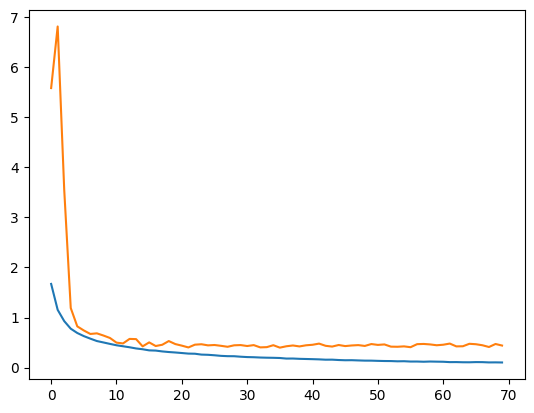

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [19]:
eval = model.evaluate(validation_dataset, batch_size=BATCH_SIZE)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8928 - loss: 0.4320


In [20]:
for images, labels in validation_dataset.take(1):
    predictions = model.predict(images)
    predicted_labels = tf.argmax(predictions, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


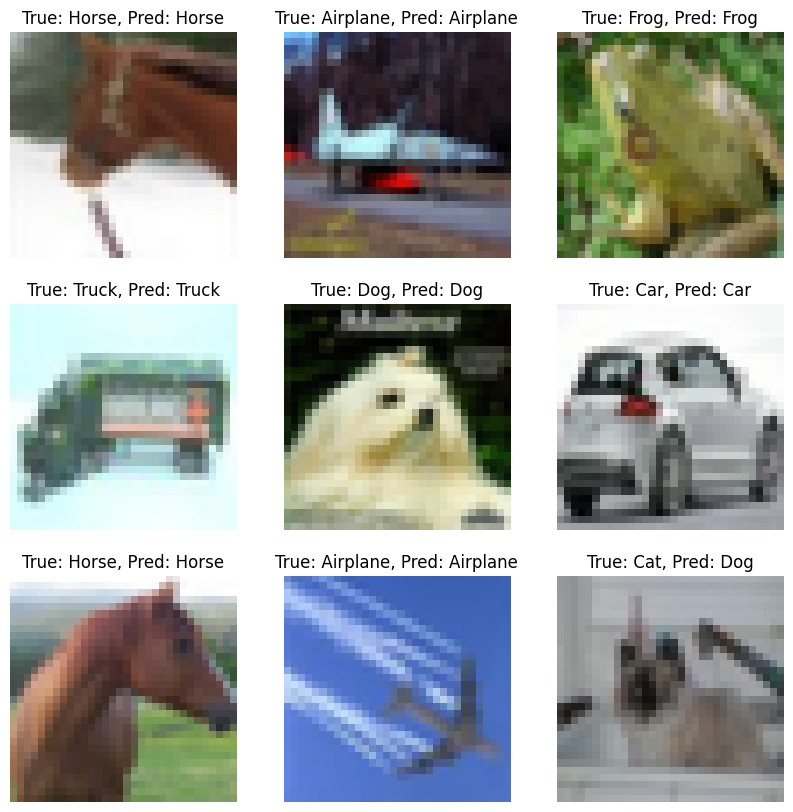

In [21]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy())
    plt.title(f"True: {classes[labels[i].numpy()]}, Pred: {classes[predicted_labels[i].numpy()]}")
    plt.axis('off')
plt.show()